In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from datetime import datetime
import os
from tensorflow.keras.models import load_model

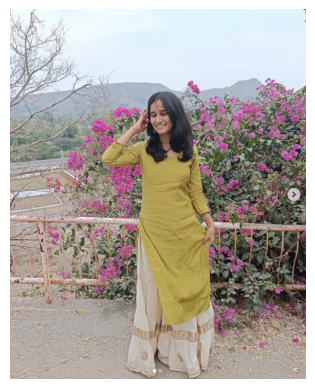

In [77]:
img_path = "C:\\Users\\ASUS\\Pictures\\Screenshots\\Screenshot 2024-06-15 214935.png"
img = cv.imread(img_path)

rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img =  cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(rgb_img)
plt.axis('off')
plt.show()

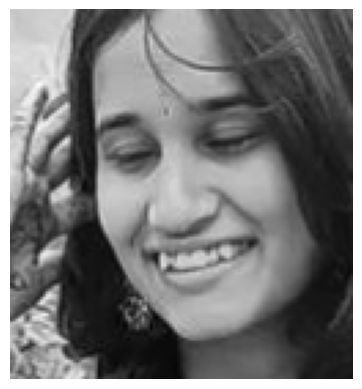

In [79]:
face_cascade = cv.CascadeClassifier(r'models\haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray_img, 1.2, 5)

for (x, y, w, h) in faces:
    face = gray_img[y-10:y+h+20, x-10:x+w+10]
    
plt.imshow(face,cmap='gray')
plt.axis('off')
plt.show()

In [80]:
date = datetime.now().strftime("%Y%m%d%H%M%S")
dir = 'data\\new_data\\cleaned'
path = os.path.join(dir,date)
cv.imwrite(path + '.jpg',face)

True

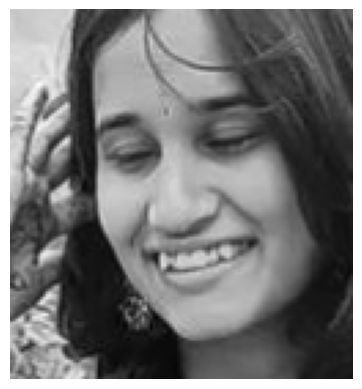

In [81]:
img = face
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [82]:
resize_img = cv.resize(img,(64,64))
array = np.array(resize_img)
x = array.reshape(-1,64, 64, 1)

In [83]:
def pre(img):
    rescale = img/255
    return rescale

x = np.array(list(map(pre,x)))

In [86]:
model = load_model(r'models\model_1.h5')
pred = model.predict(x)
output = np.argmax(pred,axis=1)

1/1 [==============================] - 0s 291ms/step


In [94]:
pred.flatten().ndim

1